In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Build pipeline with explicit step names
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', LogisticRegression(max_iter = 1000))

     ]
)

param_grid = {
    'model__C':[0.01,0.1,1,10],
    'model__penalty': ['l2'],
    'model__solver':['lbfgs', 'liblinear']
}

grid = GridSearchCV(pipe, param_grid, cv = 10)
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")
print(f"Best cross-val score: {grid.best_score_}")


y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)       # Class probabilities

# --- SCORES ---
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")
score = grid.score(X_test, y_test)        # Same as accuracy_score
print(f"score:{score}")

# --- METRICS REPORT ---
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# --- OUTPUT ---
print("Predicted labels:\n", y_pred)
print("Predicted probabilities:\n", y_prob)
print("Accuracy (from score):", score)
print("Accuracy (manual):", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('model', LogisticRegression(max_iter=1000))
# ])

# # Define parameter grid (easy to read and control)
# param_grid = {
#     'model__C': [0.01, 0.1, 1, 10],
#     'model__penalty': ['l2'],
#     'model__solver': ['lbfgs', 'liblinear']
# }

# # Run GridSearchCV
# grid = GridSearchCV(pipe, param_grid, cv=5)
# grid.fit(X, y)

# print("Best parameters:", grid.best_params_)
# print("Best cross-val score:", grid.best_score_)

Best Parameters: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best cross-val score: 0.9666666666666666
accuracy: 1.0
score:1.0
Predicted labels:
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
Predicted probabilities:
 [[9.98178331e-01 1.82166858e-03 3.12871538e-13]
 [1.33456336e-04 3.08382695e-01 6.91483849e-01]
 [8.00762748e-02 9.19731357e-01 1.92368554e-04]
 [3.76137088e-02 9.62140404e-01 2.45886853e-04]
 [9.99259039e-01 7.40961457e-04 7.62730506e-14]
 [1.52299079e-03 9.07997280e-01 9.04797296e-02]
 [9.99829433e-01 1.70567092e-04 2.17370360e-15]
 [9.83888495e-01 1.61115054e-02 2.03467327e-12]
 [1.93664654e-06 4.15742915e-02 9.58423772e-01]
 [1.48626928e-02 9.08546919e-01 7.65903885e-02]
 [5.72692472e-09 7.77580391e-03 9.92224190e-01]
 [8.86598611e-08 8.66885263e-03 9.91331059e-01]
 [1.82990198e-08 1.29945186e-03 9.98700530e-01]
 [1.17582233e-03 9.70691020e-01 2.81331572e-02]
 [9.96856756e-01 3.14324410e-03 2.62450688e-13]
 [9.95644623e-01 4.35537

In [ ]:
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/stevechengnyc/meta_learners/refs/heads/main/peacock_user_data_propensity.csv')
df.head(100)

,user_id,tenure_months,prior_engagement_score,weekly_watch_hours,num_devices,device_type,payment_method,account_type,has_kids_profile,region,promo_eligible,assigned_promo
0,0,3,0.323,1.8,5,tablet,apple_pay,ad_supported,0,northeast,1,1
1,1,29,0.086,3.8,2,smart_tv,gift_card,premium,0,midwest,1,1
2,2,35,0.435,3.8,3,smart_tv,apple_pay,student_discount,0,northeast,1,0
3,3,18,0.079,3.3,3,web,gift_card,premium,0,northeast,1,1
4,4,20,0.310,2.8,2,mobile,gift_card,ad_supported,0,south,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,4,0.123,2.0,5,mobile,credit_card,premium,1,northeast,1,1
96,96,8,0.057,4.9,4,web,gift_card,ad_supported,1,west,1,1
97,97,25,0.149,4.5,4,smart_tv,paypal,ad_supported,0,midwest,1,1
98,98,7,0.226,2.6,3,tablet,credit_card,premium,1,west,1,1


In [ ]:
df.shape

(5000, 12)

In [ ]:
df.dtypes

,0
user_id,int64
tenure_months,int64
prior_engagement_score,float64
weekly_watch_hours,float64
num_devices,int64
device_type,object
payment_method,object
account_type,object
has_kids_profile,int64
region,object


In [ ]:
df.head()

,user_id,tenure_months,prior_engagement_score,weekly_watch_hours,num_devices,device_type,payment_method,account_type,has_kids_profile,region,promo_eligible,assigned_promo
0,0,3,0.323,1.8,5,tablet,apple_pay,ad_supported,0,northeast,1,1
1,1,29,0.086,3.8,2,smart_tv,gift_card,premium,0,midwest,1,1
2,2,35,0.435,3.8,3,smart_tv,apple_pay,student_discount,0,northeast,1,0
3,3,18,0.079,3.3,3,web,gift_card,premium,0,northeast,1,1
4,4,20,0.310,2.8,2,mobile,gift_card,ad_supported,0,south,1,1


In [ ]:
df[df['promo_eligible'] == 0]['user_id'].nunique()

978

In [ ]:
df[df['promo_eligible'] == 1]['user_id'].nunique()

4022

In [ ]:
df[df['promo_eligible'] == 0]['user_id'].count()

np.int64(978)

In [ ]:
df[df['promo_eligible'] == 0]['user_id'].size()

TypeError: 'int' object is not callable

In [ ]:
df.columns

Index(['user_id', 'tenure_months', 'prior_engagement_score',
       'weekly_watch_hours', 'num_devices', 'device_type', 'payment_method',
       'account_type', 'has_kids_profile', 'region', 'promo_eligible',
       'assigned_promo'],
      dtype='object')

In [ ]:
df.dtypes

,0
user_id,int64
tenure_months,int64
prior_engagement_score,float64
weekly_watch_hours,float64
num_devices,int64
device_type,object
payment_method,object
account_type,object
has_kids_profile,int64
region,object


In [ ]:
#feature and target

X = df.drop(columns = ['user_id', 'assigned_promo'])
y = df['assigned_promo']




In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size =0.2, random_state = 88)

In [ ]:
y_train.head()

,assigned_promo
354,0
3714,1
2007,0
3958,1
4466,1


In [ ]:
y_train.value_counts(), y_test.value_counts()

(assigned_promo
 1    2713
 0    1287
 Name: count, dtype: int64,
 assigned_promo
 1    678
 0    322
 Name: count, dtype: int64)

In [ ]:
y_train.value_counts()[0]/y_train.shape[0]

np.float64(0.32175)

In [ ]:
df.dtypes

,0
user_id,int64
tenure_months,int64
prior_engagement_score,float64
weekly_watch_hours,float64
num_devices,int64
device_type,object
payment_method,object
account_type,object
has_kids_profile,int64
region,object


In [ ]:
df['has_kids_profile'].value_counts()

,count
has_kids_profile,
0,3471
1,1529


In [ ]:
df.dtypes

,0
user_id,int64
tenure_months,int64
prior_engagement_score,float64
weekly_watch_hours,float64
num_devices,int64
device_type,object
payment_method,object
account_type,object
has_kids_profile,int64
region,object


In [ ]:
#Preprocessing
numerical_features = X.select_dtypes(['int64', 'float64']).columns.tolist()
print(numerical_features)
#pick up binary features
binary_cols = [col for col in numerical_features if X[col].nunique() ==2]
print(binary_cols)
#numerical features
numerical_features = [col for col in numerical_features if col not in binary_cols]
print(numerical_features)
#categorical features
categorical_features = X.select_dtypes('object', 'category').columns.tolist()
print(categorical_features)

['tenure_months', 'prior_engagement_score', 'weekly_watch_hours', 'num_devices', 'has_kids_profile', 'promo_eligible']
['has_kids_profile', 'promo_eligible']
['tenure_months', 'prior_engagement_score', 'weekly_watch_hours', 'num_devices']
['device_type', 'payment_method', 'account_type', 'region']


In [ ]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output= False), categorical_features)
    ],
    remainder = 'passthrough'

)

In [ ]:
#logistic regression pipeline
lr_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter = 1000))
    ]
)

In [ ]:
#xgbt regression pipeline
xgb_pipeline = Pipeline(
    [
        ('preprcessor', preprocessor),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
    ]
)

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough  ',
                  transformers=[('num', StandardScaler(),
                                 ['user_id', 'tenure_months',
                                  'prior_engagement_score',
                                  'weekly_watch_hours', 'num_devices']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['device_type', 'payment_method',
                                  'account_type', 'region'])])

In [ ]:
lr_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'prior_engagement_score',
                                                   'weekly_watch_hours',
                                                   'num_devices']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['device_type',
                                                   'payment_method',
                                                   'account_type',
                                                   'region'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
xgb_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:11:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprcessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['tenure_months',
                                                   'prior_engagement_score',
                                                   'weekly_watch_hours',
                                                   'num_devices']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['device_type',
                                                   'payment_method',
                                                   'account_type',
                                                   'region'])])),
                ('classifier',
                 XGBClassifier(base_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# Evaluate
def evaluate(model, X_test, y_test, title):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\n{{title}} AUC: {{auc:.4f}}")
    print(classification_report(y_test, model.predict(X_test)))

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{{title}} (AUC = {{auc:.2f}})")




{title} AUC: {auc:.4f}
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       322
           1       0.90      0.97      0.93       678

    accuracy                           0.91      1000
   macro avg       0.91      0.87      0.89      1000
weighted avg       0.91      0.91      0.90      1000


{title} AUC: {auc:.4f}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       678

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



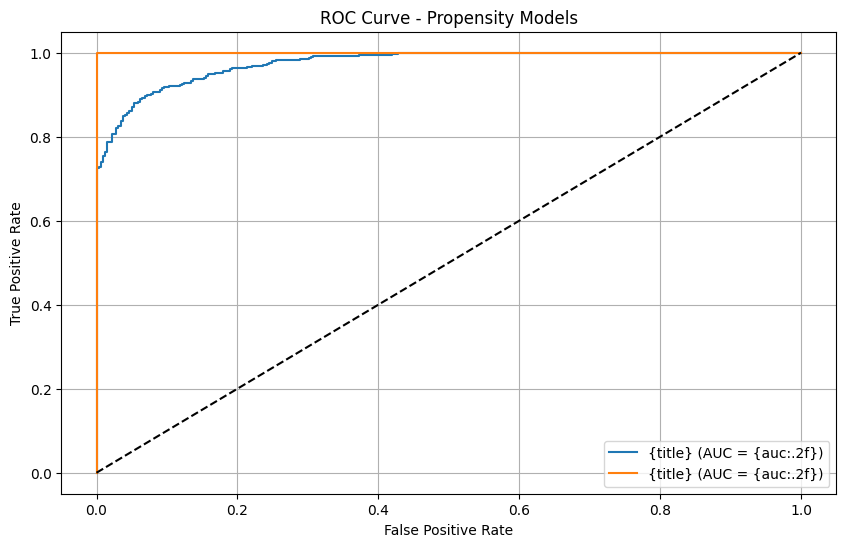

In [ ]:
plt.figure(figsize=(10, 6))
evaluate(lr_pipeline, X_test, y_test, "Logistic Regression")
evaluate(xgb_pipeline, X_test, y_test, "XGBoost")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Propensity Models")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lr_pipeline.fit(X_train,y_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
y_test.value_counts(



)[0]/y_test.shape[0]

np.float64(0.322)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



{title} AUC: {auc:.4f}
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       483
           1       0.88      0.95      0.91      1017

    accuracy                           0.87      1500
   macro avg       0.87      0.83      0.85      1500
weighted avg       0.87      0.87      0.87      1500


{title} AUC: {auc:.4f}
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       483
           1       0.90      0.92      0.91      1017

    accuracy                           0.88      1500
   macro avg       0.86      0.85      0.86      1500
weighted avg       0.87      0.88      0.88      1500



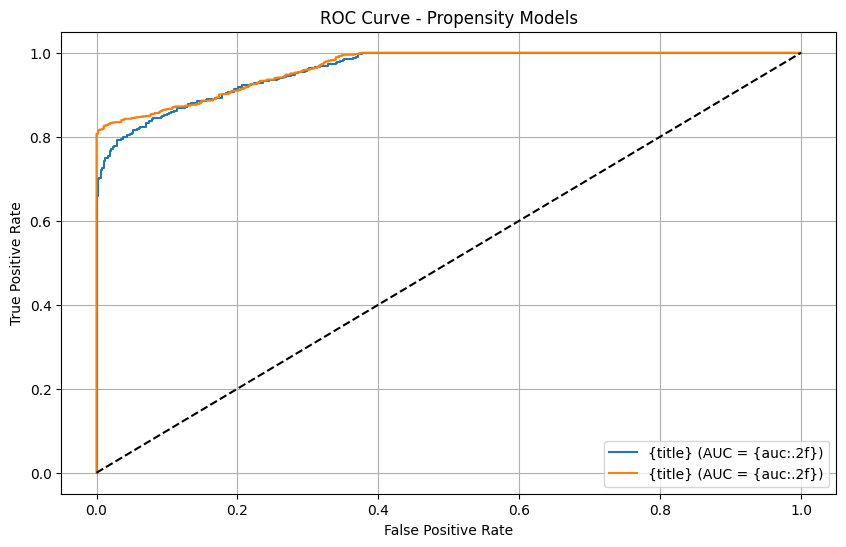

In [ ]:
# Features and target
X = df.drop(columns=["user_id", "assigned_promo"])
y = df["assigned_promo"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Preprocessing
numeric_features = ["tenure_months", "prior_engagement_score"]
categorical_features = ["device_type", "payment_method", "promo_eligible"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
])

# Train models
lr_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Evaluate
def evaluate(model, X_test, y_test, title):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\n{{title}} AUC: {{auc:.4f}}")
    print(classification_report(y_test, model.predict(X_test)))

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{{title}} (AUC = {{auc:.2f}})")

plt.figure(figsize=(10, 6))
evaluate(lr_pipeline, X_test, y_test, "Logistic Regression")
evaluate(xgb_pipeline, X_test, y_test, "XGBoost")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Propensity Models")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# # Propensity Score Modeling for Peacock Promo Email
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("peacock_user_data.csv")

# Features and target
X = df.drop(columns=["user_id", "assigned_promo"])
y = df["assigned_promo"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Preprocessing
numeric_features = ["tenure_months", "prior_engagement_score"]
categorical_features = ["device_type", "payment_method", "promo_eligible"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
])

# Train models
lr_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Evaluate
def evaluate(model, X_test, y_test, title):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\n{{title}} AUC: {{auc:.4f}}")
    print(classification_report(y_test, model.predict(X_test)))

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{{title}} (AUC = {{auc:.2f}})")

plt.figure(figsize=(10, 6))
evaluate(lr_pipeline, X_test, y_test, "Logistic Regression")
evaluate(xgb_pipeline, X_test, y_test, "XGBoost")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Propensity Models")
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'peacock_user_data.csv'